### Einführung
* Audioanalyse wird verwendet in ASR (Spracherkennung), Signalverarbeitung, Musiktagging, (Siri, Alexa)
* Hier werden .wav-Dateien verwendet

#### Audio Bibliotheken
* **librosa** - Modul für Signalverabeitung (Doku: https://librosa.github.io/librosa/)
    * `pip install librosa`

* `librosa.load()` - liefert Audio als Numpy Abtastfreq per defualt ist 22500


In [24]:
import librosa
import os

print(os.getcwd())

audio_data = '/media/kirill/WindowsD/Programmieren/ONLINE-RESSOURCEN/Nuanceprog/Python/AudioBearbietung/audio/samplecreate hiphop choir loop.wav'
#audio_data = '/media/kirill/WindowsD/Programmieren/ONLINE-RESSOURCEN/Nuanceprog/Python/AudioBearbietung/audio/test.wav'

x, sr = librosa.load(audio_data)
#x, sr = librosa.load(audio_data, sr=44100)
#x, sr = librosa.load(audio_data, sr=None) # wiederholtes Sampling ausmachen

#print(type(x), type(sr))
#print(x.shape, sr)

#librosa.load(audio_data)
#librosa.load(audio_data)


/media/kirill/WindowsD/Programmieren/ONLINE-RESSOURCEN/Nuanceprog/Python/AudioBearbietung


* mit `IPyhton.display.Audio` - kann man Audio direkt in Jupyter abspielen. (In VS Code funktioniert nicht, da kein Audio abspielen kann)  

In [25]:
import IPython.display as ipd
ipd.Audio(audio_data)

* als alterntvie wird hier mit playosund abgespielt

In [26]:
from playsound import playsound
playsound(audio_data)

mit **matplotlib** Audiodaten visualisieren

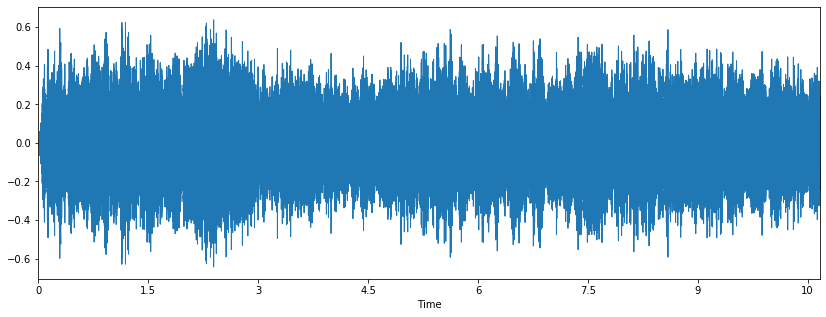

In [27]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

Audiodaten als Spektrogramm darstellen = Lautstärke bei verschiedenen Frequenzen  
Mit `librosa.display.specshow()` - kann man Spektrogramm darstellen  
mit `librosa.stft()` - Fourier-Transformation

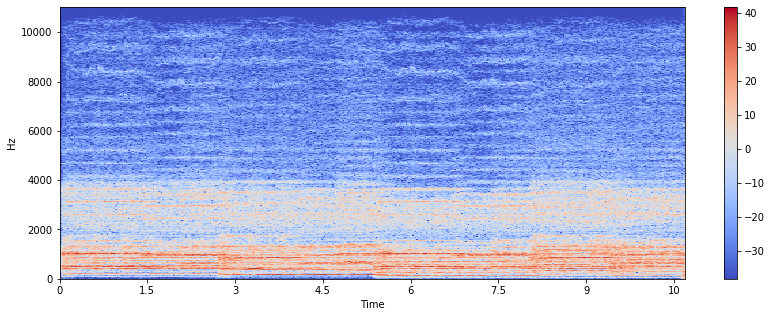

In [28]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') # Spektrogram erstellen
plt.colorbar()

Darstellung in logaritmischen Form darstelllen

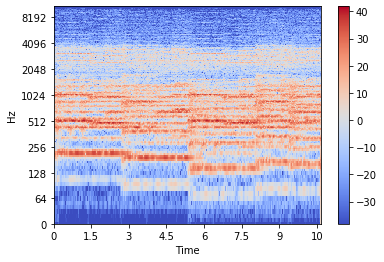

In [29]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Eigenes Audiosignal erstellen

In [30]:
import numpy as np

sr_sin = 22050
T_sin = 5.0
t_sin = np.linspace(0, T_sin, int(T_sin*sr_sin), endpoint=False) # Zeit-Variable
x_sin = 0.5*np.sin(2*np.pi*220*t) #Sin mit 220 Hz
ipd.Audio(x_sin, rate=sr_sin)
librosa.output.write_wav('./audio/sin_220.wav', x_sin, sr_sin)

# Testen die Erstellung der Datei
sin_file='./audio/sin_220.wav'
playsound(sin_file)


### Audio-Eigenschaften herausfinden
* Freqeunzen-Eigenschaften herausholen mit Hilfe von Fourier
#### Spektral Zentrum: fc = Sum_k S(k)*f(k)/ Sum_k S(k); S(k) - Amp der Freq
* `spectral_centroid()` - return Array = der Framemenge im Sample

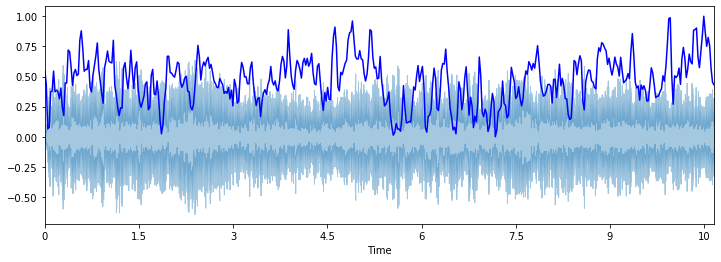

In [31]:
import sklearn

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)# Вычисление временной переменной для визуализации

plt.figure(figsize=(12, 4))

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)# Построение спектрального центроида вместе с формой волны

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

#### Spektral Abfall
* Frequenzen, deren Lautstäre bis auf Null geht => Lautstäre wo niedrige Freq 85% der Gesamtlautstärke ausmachen

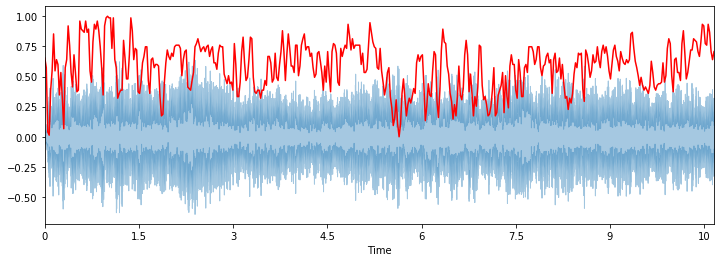

In [33]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr = sr)[0]
plt.figure(figsize=(12,4))
librosa.display.waveplot(y=x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

#### Spektrale Breite - ?? nicht verstanden was es sit

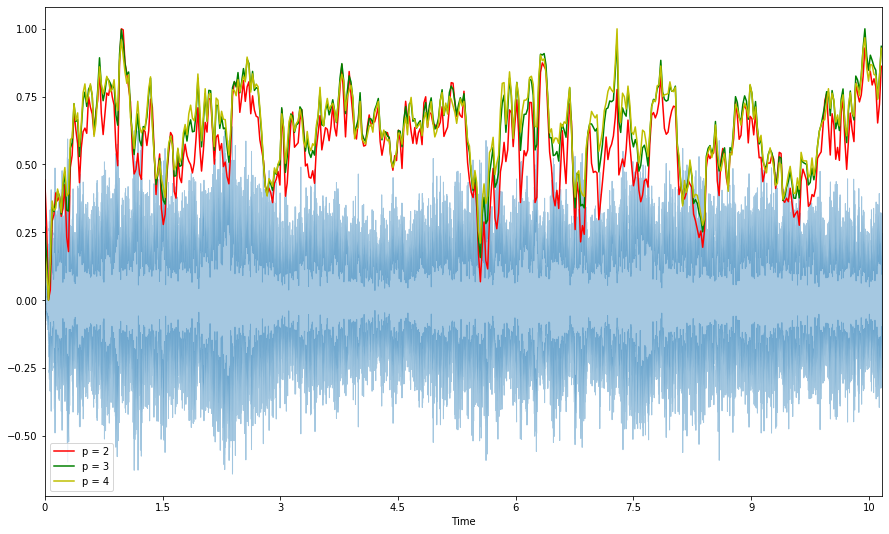

In [34]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

#### Null-Durchgang-Geschwindigkeit
* die Glättung des Signals berechnen: zcr = (1/T-1)SUM_1-T-1{s_t*s_t-1 < 0}

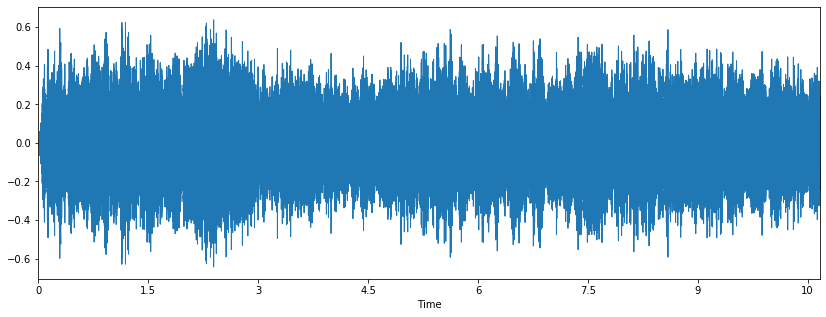

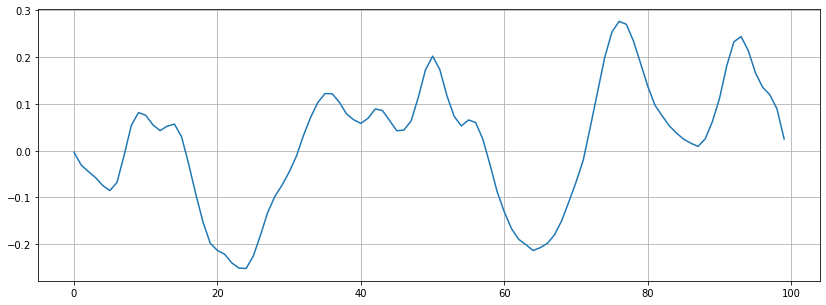

In [35]:
#x, sr = librosa.load('/../../gruesome.wav')
# Построение графика сигнала:
# erster Plot
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Увеличение масштаба:
n0 = 9000
n1 = 9100
# zweiter Plot
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

# Anzahl der Nullduchgänge ausgeben
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

#### Klangfarbe
* die vorkommenden Noten im Signal (Vektor aus 12 Elementen)
* wird benutzt um Ähnlichkeiten zwischen den Musikstücken zu finden


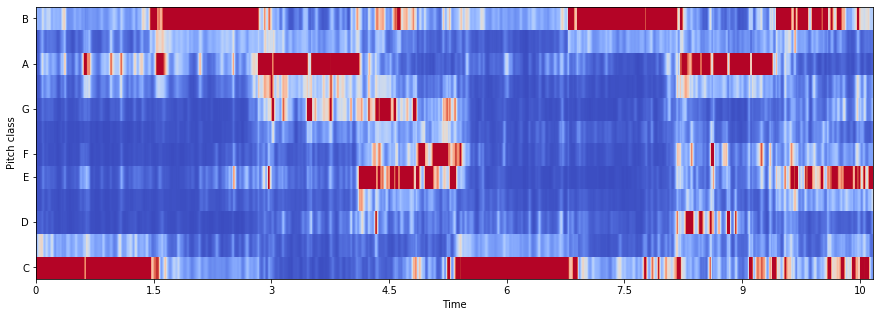

In [39]:
hop_length = 12
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')